# Simulation 1


In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
from af_noma import af_noma as noma
from tqdm import tqdm

def db2pow( db_v: float ):
    return 10 ** ( db_v / 10.0 )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### System Parameters

In [8]:
# System parameters -------------------------------------------
# Number of users
num_users = 3
# TX power
tx_power = 1
# Power allocation
power_alloc = [0.7,0.2,0.1]
# IDs of transmitted and recovered symbols
t_symbols_id = [0,0,0]
r_symbols_id = [1,1,1]
# QAM constellation order
qam_order = 4
sp = noma.NomaSystem( num_users, tx_power, power_alloc, t_symbols_id, r_symbols_id, qam_order )

### Fading parameters

In [9]:
# Fading parameters -------------------------------------------
alpha=3.5
ms=3
mu=1.5
z=[0.7,8]
fp = [ noma.AFFading(alpha,ms,mu,z[0]), noma.AFFading(alpha,ms,mu,z[1]) ]

### Alpha-F RVs generator

In [10]:
rv_gens = [ noma.get_random_generator( fp[0], [0, 100] ), noma.get_random_generator( fp[1], [0, 100] ) ]

### Analytical results

In [11]:
# SNR-Domain
num_points = 50
g_v = np.linspace(-20, 30, num=num_points)

# Analytical PEP
pep = np.ones([2, num_points, num_users])

# Assymptotic PEP
assy_pep = np.ones([2, num_points, num_users])

for i in range(0,2):
    for n in tqdm(range(0, len(g_v)), desc ="Processando..."):
        for l in range(1, num_users+1):

            # Convert to linear
            gamma_pow = db2pow(g_v[n])
            # Compute analytical
            pep[i,n,l-1] = noma.compute_lth_user_pep( l, sp, fp[i], gamma_pow )
            # Compute assymptotic
            assy_pep[i,n,l-1] = noma.compute_lth_user_assym_pep( l, sp, fp[i], gamma_pow )


Processando...: 100%|███████████████████████████| 50/50 [01:46<00:00,  2.13s/it]


### Monte-Carlo Simulation

In [12]:
# SNR-Domain
num_points_mc = 10
g_v_mc = np.linspace(-20, 30, num=num_points_mc)
mc_pep = np.ones([2, num_points_mc, num_users])
# Number of samples
num_samples=10000000

for i in range(0,2):
    for n in tqdm(range(0, len(g_v_mc)), desc ="Processando..."):
        # Convert to linear
        gamma_pow = db2pow(g_v_mc[n])
        # Compute MC
        mc_pep[i,n,:] = noma.pep_monte_carlo_sim( sp, 1.0 / gamma_pow, rv_gens[i], num_samples )

Processando...: 100%|███████████████████████████| 10/10 [00:08<00:00,  1.13it/s]


### Figure

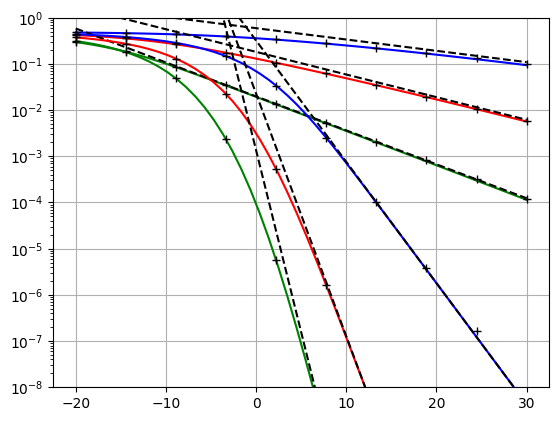

In [13]:
import matplotlib.pyplot as plt

for i in range(0,2):
    
    np.savetxt(f'./results/fig1_analy_c={i}_l=1.csv', pep[i,:,0])
    np.savetxt(f'./results/fig1_analy_c={i}_l=2.csv', pep[i,:,1])
    np.savetxt(f'./results/fig1_analy_c={i}_l=3.csv', pep[i,:,2])
        
    np.savetxt(f'./results/fig1_assy_c={i}_l=1.csv', assy_pep[i,:,0])
    np.savetxt(f'./results/fig1_assy_c={i}_l=2.csv', assy_pep[i,:,1])
    np.savetxt(f'./results/fig1_assy_c={i}_l=3.csv', assy_pep[i,:,2])
        
    np.savetxt(f'./results/fig1_sim_c={i}_l=1.csv', mc_pep[i,:,0])
    np.savetxt(f'./results/fig1_sim_c={i}_l=2.csv', mc_pep[i,:,1])
    np.savetxt(f'./results/fig1_sim_c={i}_l=3.csv', mc_pep[i,:,2])
        
    plt.semilogy(g_v, pep[i,:,0], color="blue")
    plt.semilogy(g_v, assy_pep[i,:,0], ls='--', color="black")
    plt.semilogy(g_v_mc, mc_pep[i,:,0], marker='+', color="black",linestyle='None')    

    plt.semilogy(g_v, pep[i,:,1], color="red")
    plt.semilogy(g_v, assy_pep[i,:,1], ls='--', color="black")
    plt.semilogy(g_v_mc, mc_pep[i,:,1], marker='+', color="black",linestyle='None')
    
    plt.semilogy(g_v, pep[i,:,2], color="green")
    plt.semilogy(g_v, assy_pep[i,:,2], ls='--', color="black")
    plt.semilogy(g_v_mc, mc_pep[i,:,2], marker='+', color="black",linestyle='None')
    
plt.grid()
plt.ylim([1e-8,1])
plt.show()


# Simulation 2

In [14]:
# System parameters -------------------------------------------
# Number of users
num_users = 3
# TX power
tx_power = 1
# Power allocation
power_alloc = [0.7,0.2,0.1]
# IDs of transmitted and recovered symbols
t_symbols_id = [0,0,0]
r_symbols_id = [1,1,1]
# QAM constellation order
qam_order = 4
sp = noma.NomaSystem( num_users, tx_power, power_alloc, t_symbols_id, r_symbols_id, qam_order )

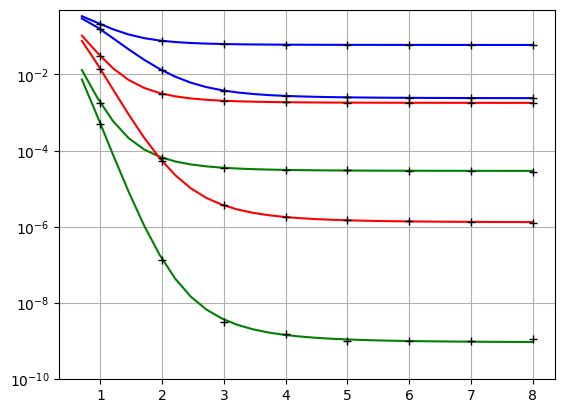

In [15]:
# Fading parameters -------------------------------------------
alpha_v=[2,5]
ms=2
mu_v=[2]
num_points_z = 30
z_v = np.linspace(0.7, 8, num=num_points_z)
# fp = [ noma.AFFading(alpha,ms,mu,z[0]), noma.AFFading(alpha,ms,mu,z[1]) ]

# SNR
snr = 5
gamma_pow = db2pow(snr)

# Analytical PEP
n_a = len(alpha_v)
n_mu = len(mu_v)
n_z = num_points_z
pep = np.ones([n_a, n_mu, num_users, n_z])

for a in range(0, n_a):
    for m in range(0, n_mu):
        for n in range(0, n_z):
            
            alpha = alpha_v[a]
            mu = mu_v[m]
            z = z_v[n]
            fp = noma.AFFading(alpha,ms,mu,z)
            
            for l in range(1, num_users+1):
                
                pep[a,m,l-1,n] = noma.compute_lth_user_pep( l, sp, fp, gamma_pow )

        plt.semilogy(z_v, pep[a,m,0,:], color="blue")
        plt.semilogy(z_v, pep[a,m,1,:], color="red")
        plt.semilogy(z_v, pep[a,m,2,:], color="green")

        np.savetxt(f'./results/fig2_analy_a={a}_m={m}_l=1.csv', pep[a,m,0,:])
        np.savetxt(f'./results/fig2_analy_a={a}_m={m}_l=2.csv', pep[a,m,1,:])
        np.savetxt(f'./results/fig2_analy_a={a}_m={m}_l=3.csv', pep[a,m,2,:])
        
num_points_z = 8
z_v = np.linspace(1, 8, num=num_points_z)
mc_pep = np.ones([n_a, n_mu, num_users, num_points_z])
num_samples=1000000
for a in range(0, n_a):
    for m in range(0, n_mu):
        for n in range(0, num_points_z):
            
            alpha = alpha_v[a]
            mu = mu_v[m]
            z = z_v[n]
            fp = noma.AFFading(alpha,ms,mu,z)
            rv_gen = noma.get_random_generator( fp, [0, 100] )
            
            mc_pep_aux = noma.pep_monte_carlo_sim( sp, 1.0 / gamma_pow, rv_gen, num_samples )
            
            for l in range(1, num_users+1):
                mc_pep[a,m,l-1,n] = mc_pep_aux[l-1]

        plt.semilogy(z_v, mc_pep[a,m,0,:], marker='+', color="black",linestyle='None')
        plt.semilogy(z_v, mc_pep[a,m,1,:], marker='+', color="black",linestyle='None')
        plt.semilogy(z_v, mc_pep[a,m,2,:], marker='+', color="black",linestyle='None')
        
        np.savetxt(f'./results/fig2_sim_a={a}_m={m}_l=1.csv', mc_pep[a,m,0,:])
        np.savetxt(f'./results/fig2_sim_a={a}_m={m}_l=2.csv', mc_pep[a,m,1,:])
        np.savetxt(f'./results/fig2_sim_a={a}_m={m}_l=3.csv', mc_pep[a,m,2,:])
        
plt.grid()
plt.ylim([1e-10,0.5])
plt.show()



# Simulation 3

In [16]:
# System parameters -------------------------------------------
# Number of users
num_users = 3
# TX power
tx_power = 1
# Power allocation
power_alloc = [0.7,0.2,0.1]
# IDs of transmitted and recovered symbols
t_symbols_id = [0,0,0]
r_symbols_id = [1,1,1]
# QAM constellation order
qam_order = 4
sp = noma.NomaSystem( num_users, tx_power, power_alloc, t_symbols_id, r_symbols_id, qam_order )

In [17]:
# Fading parameters -------------------------------------------
alpha=[2.5,2.5]
ms=3
mu=[2.0,2.0]
z=[2,3]
fp = [ noma.AFFading(alpha[0],ms,mu[0],z[0]), noma.AFFading(alpha[1],ms,mu[1],z[1]) ]


Processando...: 100%|███████████████████████████| 30/30 [01:11<00:00,  2.40s/it]


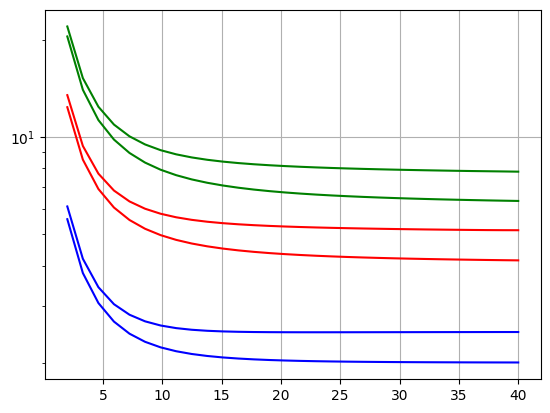

In [19]:
# SNR-Domain
num_points = 30
g_v = np.linspace(2, 40, num=num_points)

# Analytical PEP
ds = np.ones([2, num_points, num_users])

for i in range(0,2):
    for n in tqdm(range(0, len(g_v)), desc ="Processando..."):
        for l in range(1, num_users+1):

            # Convert to linear
            gamma_pow = db2pow(g_v[n])
            # Compute analytical
            pep = noma.compute_lth_user_pep( l, sp, fp[i], gamma_pow )
            ds[i,n,l-1] = -np.log10(pep) / np.log10(gamma_pow)
            
    plt.semilogy(g_v, ds[i,:,0], color="blue")
    plt.semilogy(g_v, ds[i,:,1], color="red")
    plt.semilogy(g_v, ds[i,:,2], color="green")
    
    np.savetxt(f'./results/fig3_analy_c={i}_l=1.csv', ds[i,:,0])
    np.savetxt(f'./results/fig3_analy_c={i}_l=2.csv', ds[i,:,1])
    np.savetxt(f'./results/fig3_analy_c={i}_l=3.csv', ds[i,:,2])
    
    
plt.grid()
plt.show()  

# Simulation 4

In [20]:
# System parameters -------------------------------------------
# Number of users
num_users = 2
# TX power
tx_power = 1
# Power allocation
power_alloc = [0.8,0.2]
# IDs of transmitted and recovered symbols
t_symbols_id = [0,0,0]
r_symbols_id = [1,1,1]
# QAM constellation order
qam_order = 2
sp = noma.NomaSystem( num_users, tx_power, power_alloc, t_symbols_id, r_symbols_id, qam_order )

# Fading parameters -------------------------------------------
alpha=3
ms=[2,5]
mu=2
z=[1,8]
fp = [ noma.AFFading(alpha,ms[0],mu,z[0]), noma.AFFading(alpha,ms[1],mu,z[1]) ]

In [21]:
rv_gens = [ noma.get_random_generator( fp[0], [0, 100] ), noma.get_random_generator( fp[1], [0, 100] ) ]

In [22]:
gamma_pow = db2pow(-10)
_, c_seq_0,_,info_cseq_0 = noma.ber_monte_carlo_sim_sys( sp, 1 / gamma_pow, rv_gens[0], 100000 )
_, c_seq_1,_,info_cseq_1 = noma.ber_monte_carlo_sim_sys( sp, 1 / gamma_pow, rv_gens[1], 100000 )

c_seq = [c_seq_0,c_seq_1]
info_cseq = [info_cseq_0,info_cseq_1]

In [24]:
# Union bound
num_points = 30
g_v = np.linspace(0, 25, num=num_points)
union_bound = np.zeros([2, num_points, num_users])
for i in range(0,2):
    for n in tqdm(range(0, len(g_v)), desc ="Processando..."):
        # Convert to linear
        gamma_pow = db2pow(g_v[n])
        for l in range(1, num_users+1):
            union_bound[i,n,l-1],_,_ = noma.compute_union_bound4( sp, fp[i], gamma_pow, l, c_seq[i][l-1], info_cseq[i][l-1] )
            

Processando...: 100%|███████████████████████████| 30/30 [00:03<00:00,  9.09it/s]


In [ ]:
num_points = 15
g_vu = np.linspace(0, 25, num=num_points)
ber = np.ones([2, num_points, num_users])
num_samples = 1000000
for i in range(0,2):
    for n in range(0, len(g_vu)):
        # Convert to linear
        gamma_pow = db2pow(g_vu[n])
        # Compute BER
        num_samples = np.min([ 6000000, 100000 * round( 1 / union_bound[i,n,num_users - 1] ) ])
        print(f'{n}-th Interaction, {num_samples} samples {70 * "*"}')
        ber_l,_,_,_ = noma.ber_monte_carlo_sim_sys( sp, 1 / gamma_pow, rv_gens[i], num_samples )
        for l in range(1, num_users+1):
            ber[i,n,l-1] = ber_l[l-1]


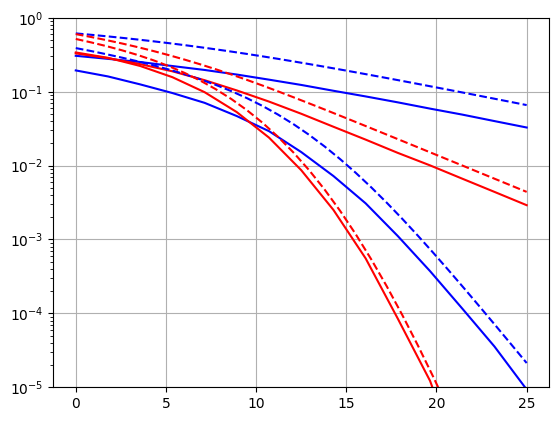

In [26]:
import matplotlib.pyplot as plt

for i in range(0,2):
    
    np.savetxt(f'./results/fig4_analy_c={i}_l=1.csv', union_bound[i,:,0])
    np.savetxt(f'./results/fig4_analy_c={i}_l=2.csv', union_bound[i,:,1])
        
    np.savetxt(f'./results/fig4_sim_c={i}_l=1.csv', ber[i,:,0])
    np.savetxt(f'./results/fig4_sim_c={i}_l=2.csv', ber[i,:,1])
        
    plt.semilogy(g_vu, ber[i,:,0], color="blue")
    plt.semilogy(g_v, union_bound[i,:,0], ls='--', color="blue")
    
    plt.semilogy(g_vu, ber[i,:,1], color="red")
    plt.semilogy(g_v, union_bound[i,:,1], ls='--', color="red")

plt.ylim([1e-5,1])
plt.show()

# Simulation 5

In [36]:
# System parameters -------------------------------------------
# Number of users
num_users = 2
# TX power
tx_power = 1
# IDs of transmitted and recovered symbols
t_symbols_id = [0,0,0]
r_symbols_id = [1,1,1]
# QAM constellation order
qam_order = 2

sp = noma.NomaSystem( num_users, tx_power, [0.7,0.3], t_symbols_id, r_symbols_id, qam_order )
# Sequences
_, c_seq_0,_,info_cseq_0 = noma.ber_monte_carlo_sim_sys( sp, 1 / db2pow(-10), rv_gens[0], 10000 )
_, c_seq_1,_,info_cseq_1 = noma.ber_monte_carlo_sim_sys( sp, 1 / db2pow(-10), rv_gens[1], 10000 )
c_seq = [c_seq_0,c_seq_1]
info_cseq = [info_cseq_0,info_cseq_1]

gamma_pow = db2pow( 15 )
# Fading parameters -------------------------------------------
alpha=2.5
ms=1.5
mu=3
z=[0.7,2]
fp = [ noma.AFFading(alpha,ms,mu,z[0]), noma.AFFading(alpha,ms,mu,z[1]) ]
rv_gens = [ noma.get_random_generator( fp[0], [0, 100] ), noma.get_random_generator( fp[1], [0, 100] ) ]

num_points = 30
b1 = np.linspace(0.3, 0.95, num=num_points)
union_bound = np.zeros([2, num_points, num_users])
ber = np.ones([num_points, 2])
num_samples = 100000
for i in range(0,2):
    for n in range(0, len(b1)):

        # Power allocation
        power_alloc = [b1[n],1-b1[n]]
        # System parameters
        sp = noma.NomaSystem( num_users, tx_power, power_alloc, t_symbols_id, r_symbols_id, qam_order )

    
        for l in range(1, num_users+1):
            union_bound[i,n,l-1],_,_ = noma.compute_union_bound4( sp, fp[i], gamma_pow, l, c_seq[i][l-1], info_cseq[i][l-1] )
            

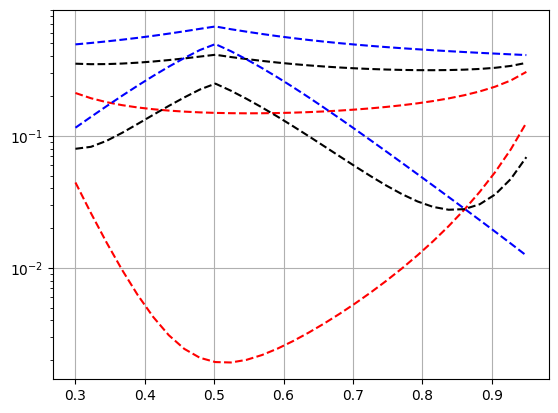

In [37]:
import matplotlib.pyplot as plt

for i in range(0,2):
    

    plt.semilogy(b1, union_bound[i,:,0], ls='--', color="blue")
    plt.semilogy(b1, union_bound[i,:,1], ls='--', color="red")
    plt.semilogy(b1, (union_bound[i,:,1] + union_bound[i,:,0])/2, ls='--', color="black")

plt.grid()
plt.show()